In [1]:
import numpy as np
import matplotlib.pyplot as plt
from physunits import um, nm, ppm

from coatings.materials import *
from coatings import qw_stack, Material
from coatings.layers import stack_R, field_zmag
from coatings.plot import plot_layers, plot_spectral

In [2]:
lam_ref = 1550 * nm
silica = Material(SiO2) # 1.45
amorphous_silicon = Material(aSi_123) 
tantala = Material(Ta2O5) #2.06
Nlayers = 22

stack = qw_stack(
    lam_ref,
    substrate=amorphous_silicon,
    superstrate=Material(air),
    thin_films={"A": silica, "B": tantala},
    pattern="BA" * Nlayers,
)

0.6931471805599453


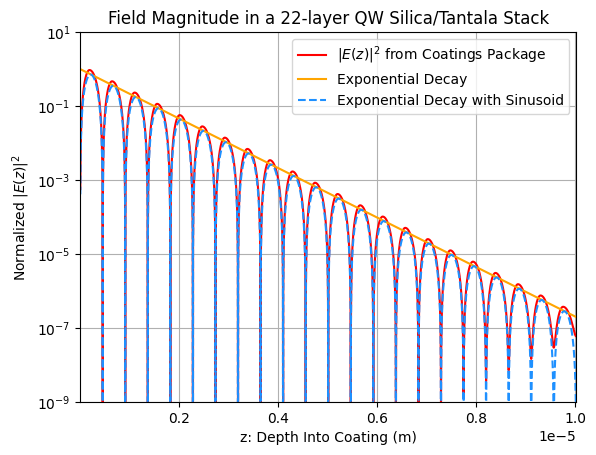

In [47]:
ns, Ls, alphas = stack["ns"], stack["Ls"], stack["alphas"]
# Normalized z-dependent field magnitude and absorption
N_points = 2**6
z_arr, Enorm = field_zmag(ns, Ls, n_pts=N_points, lam=lam_ref)
def line(x, sin=False):
    idx_low = 1.45
    idx_hi = 2.06
    idx_avg = 2/(1/idx_low + 1/idx_hi)
    lamb = 1.55e-6
    lamb_bar = lamb / (8 * np.log(idx_hi/idx_low)) * (1/idx_low + 1/idx_hi)
    if not sin:
        return np.exp(-x/lamb_bar)
    else:
        return np.exp(-x/lamb_bar) * np.sin(2 * np.pi * idx_avg * x/lamb )**2
y_line = line(z_arr)
y_sin = line(z_arr, sin=True)
print(np.log(2))
plt.semilogy(z_arr, Enorm, label="$|E(z)|^2$ from Coatings Package", color='red')
plt.semilogy(z_arr, y_line, label="Exponential Decay", color='orange')
plt.semilogy(z_arr, y_sin, label="Exponential Decay with Sinusoid", linestyle="--", color='dodgerblue')
plt.grid()
plt.legend()
plt.xlim([min(z_arr), max(z_arr)])
plt.ylim([1e-9, 1e1])
plt.title("Field Magnitude in a 22-layer QW Silica/Tantala Stack")
plt.xlabel("z: Depth Into Coating (m)")
plt.ylabel("Normalized $|E(z)|^2$")
plt.savefig("field_mag.pdf", bbox_inches='tight')

T = 0.2 ppm at 1.55 um.


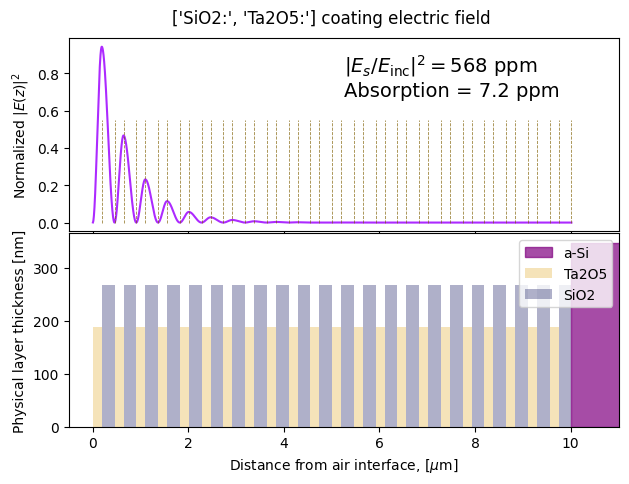

In [4]:
T_ref = 1 - stack_R(lam_ref, stack)
print(Rf"T = {T_ref/ppm:.1f} ppm at {lam_ref/um:.2f} um.")
plot_layers(stack)

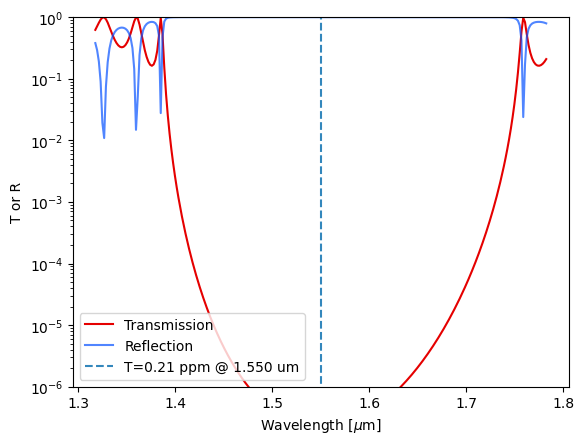

In [6]:
rel_lambdas = np.linspace(0.85 * lam_ref, 1.15 * lam_ref, 2**8)
plot_spectral(rel_lambdas, stack)
plt.show()